In [1]:
import os
import sys
import pickle

from epitome.models import *
from epitome.functions import *
from epitome.viz  import *

from epitome.constants import *
from epitome.motif_functions import *

/home/eecs/jahnavis/miniconda/envs/EpitomeNewEnv2/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
results_dir = "results/epitome_results/"
models_dir = "results/epitome_models/"
query_cell = "K562"

In [3]:
Anchor_TFs = ["CTCF", "E2F1", "EGR1", "FOXA1", "FOXA2", "GABPA", "HNF4A", "JUND", 
              "MAX", "NANOG", "REST", "TAF1"]
pd.DataFrame(Anchor_TFs, columns=['TF']).to_csv("data/epitome_data/Anchor_TFs.csv")

In [4]:
anchor_overlap_TFs = ['CTCF', 'E2F1', 'EGR1', 'FOXA1', 'GABPA', 'JUND', 'MAX', 'REST', 'TAF1']
pd.DataFrame(anchor_overlap_TFs, columns=['TF']).to_csv("data/epitome_data/Anchor_Epitome_Overlap_TFs.csv")

### Load Data for CTCF

In [5]:
TF = "CTCF"
tf_results_path = os.path.join(results_dir, TF + "_results")
motif_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + "_motif")

motif_preds = np.load(motif_results_path + ".npz")['pred']
print(motif_preds.shape)

motif_results = pd.read_csv(motif_results_path + ".csv", sep="\t")
motif_results

(10000, 1)


,Unnamed: 0,query_cell,auROC,auPRC,iterations_tested,iterations_trained,predicted_transcription_factor,train_time,trained_transcription_factors
0,0,K562,0.914524,0.320833,10000.0,5000.0,CTCF,NaN,CTCF


In [10]:
TF = "CTCF"
tf_results_path = os.path.join(results_dir, TF + "_results")
mult_motif_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + "_motif_anchor")

mult_motif_preds = np.load(mult_motif_results_path + ".npz")['pred']
print(mult_motif_preds.shape)

mult_motif_results = pd.read_csv(mult_motif_results_path + ".csv", sep="\t")
mult_motif_results

(10000, 1)


,Unnamed: 0,query_cell,auROC,auPRC,iterations_tested,iterations_trained,motif_transcription_factors,predicted_transcription_factor,train_time,trained_transcription_factors
0,0,K562,0.906666,0.302716,10000.0,5000.0,"E2F1, FOXA1, CTCF, MAX, GABPA, EGR1, JUND, TAF...",CTCF,2310.356795,CTCF


In [11]:
TF = "CTCF"
tf_results_path = os.path.join(results_dir, TF + "_results")
non_motif_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + "_no_motif")

non_motif_preds = np.load(non_motif_results_path + ".npz")['pred']
print(motif_preds.shape)

non_motif_results = pd.read_csv(non_motif_results_path + ".csv", sep="\t")
non_motif_results

(10000, 1)


,Unnamed: 0,query_cell,auROC,auPRC,iterations_tested,iterations_trained,predicted_transcription_factor,train_time,trained_transcription_factors
0,0,K562,0.924967,0.359517,10000.0,5000.0,CTCF,2128.875579,CTCF


In [12]:
def generate_hist(motif_preds, mult_motif_preds, non_motif_preds):
    zipped_preds = np.concatenate((motif_preds, mult_motif_preds, non_motif_preds), axis=1)
    bins = np.linspace(0,1,11)
    plt.hist(zipped_preds, bins, alpha=0.5, label=["Single Motif", "Multiple Motifs", "Non-motif"])
    plt.xticks(bins)
    plt.legend()
    plt.title("Raw Epitome Predictions")
    plt.xlabel("Raw Predictions")
    plt.ylabel("Count")
    plt.ylim(0,220)
    plt.show()
    
    motif_ones = motif_preds[motif_preds >= 0.5].shape[0]
    mult_motif_ones = mult_motif_preds[mult_motif_preds >= 0.5].shape[0]
    non_motif_ones = non_motif_preds[non_motif_preds >= 0.5].shape[0]

    return motif_ones, mult_motif_ones, non_motif_ones

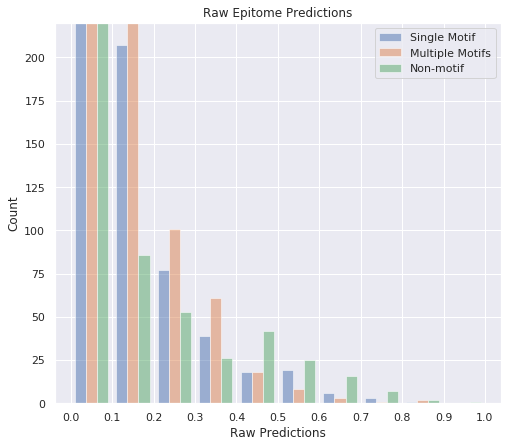

(29, 14, 51)

In [14]:
plt.figure(figsize=(8,7))
single_motif_ones, mult_motif_ones, non_motif_ones = generate_hist(motif_preds, 
                                                                   mult_motif_preds, 
                                                                   non_motif_preds)
single_motif_ones, mult_motif_ones, non_motif_ones

In [54]:
def get_tf_preds(TF):
    tf_results_path = os.path.join(results_dir, TF + "_results")
    
    # Single Motif
    motif_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + "_motif")
    motif_preds = np.load(motif_results_path + ".npz")['pred']
    print(motif_preds.shape)
    
    # Multiple Motif
    mult_motif_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + 
                                           "_motif_anchor")
    mult_motif_preds = np.load(mult_motif_results_path + ".npz")['pred']
    print(motif_preds.shape)
    
    # No motif
    non_motif_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + "_no_motif")
    non_motif_preds = np.load(non_motif_results_path + ".npz")['pred']
    print(non_motif_preds.shape)
    
    # No motif
    early_stop_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + 
                                          "_no_motif_early_stop_1000")
    early_stop_preds = np.load(early_stop_results_path + ".npz")['pred']
    print(early_stop_preds.shape)
    
    return motif_preds, mult_motif_preds, non_motif_preds, early_stop_preds

def get_tf_results(TF):
    tf_results_path = os.path.join(results_dir, TF + "_results")

    # Single Motif
    motif_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + "_motif")
    motif_results = pd.read_csv(motif_results_path + ".csv", sep="\t")
    
    # Multiple Motif
    mult_motif_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + 
                                           "_motif_anchor")
    mult_motif_results = pd.read_csv(mult_motif_results_path + ".csv", sep="\t")
    
    # No Motif
    non_motif_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + "_no_motif")
    non_motif_results = pd.read_csv(non_motif_results_path + ".csv", sep="\t")
    
    # No Motif, Early Stopping
    early_stop_results_path = os.path.join(tf_results_path, query_cell + "_" + TF + 
                                           "_no_motif_early_stop_1000")
    if not os.path.exists(early_stop_results_path + ".csv"):
        early_stop_results_path = os.path.join(tf_results_path, TF + 
                                               "_no_motif_early_stop_1000")

    early_stop_results = non_motif_results
    if TF not in ['E2F1', 'GABPA']:
        early_stop_results = pd.read_csv(early_stop_results_path + ".csv", sep="\t")

    return motif_results, mult_motif_results, non_motif_results, early_stop_results

In [55]:
overlap_auROC, overlap_auPRC = [],[]

for TF in anchor_overlap_TFs:
    single_motif_res, mult_motif_res, non_motif_res, early_stop_res = get_tf_results(TF)
    
    overlap_auROC.append([single_motif_res['auROC'][0], 
                          mult_motif_res['auROC'][0],
                          non_motif_res['auROC'][0],
                          early_stop_res['auROC'][0]])
    overlap_auPRC.append([single_motif_res['auPRC'][0], 
                          mult_motif_res['auPRC'][0],
                          non_motif_res['auPRC'][0],
                          early_stop_res['auPRC'][0]])

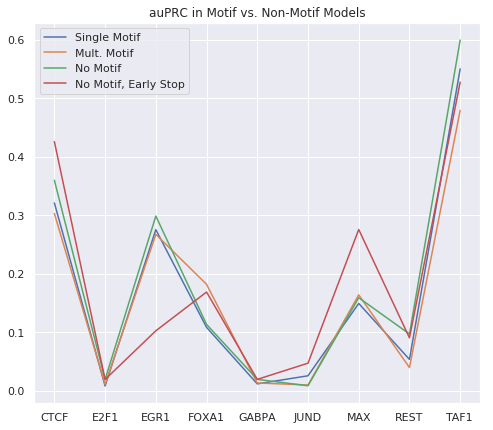

In [56]:
plt.figure(figsize=(8,7))
lineObjects = plt.plot(overlap_auPRC)
plt.title("auPRC in Motif vs. Non-Motif Models")
plt.legend(iter(lineObjects), ('Single Motif', 'Mult. Motif', 'No Motif', 'No Motif, Early Stop'))
plt.xticks(np.arange(9), labels=anchor_overlap_TFs);

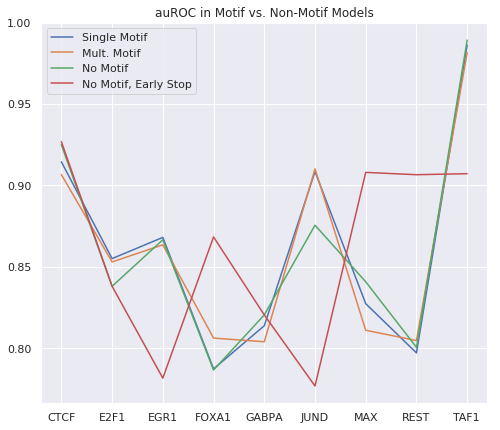

In [51]:
plt.figure(figsize=(8,7))
lineObjects = plt.plot(overlap_auROC)
plt.title("auROC in Motif vs. Non-Motif Models")
plt.legend(iter(lineObjects), ('Single Motif', 'Mult. Motif', 'No Motif', 'No Motif, Early Stop'))
plt.xticks(np.arange(9), labels=anchor_overlap_TFs);

(10000, 1)
(10000, 1)
(10000, 1)


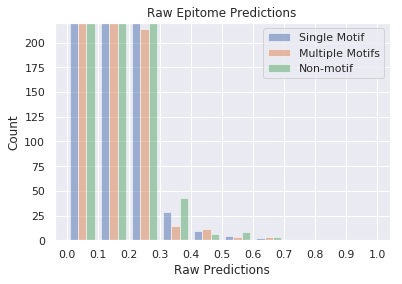

(6, 6, 11)

In [24]:
FOXA1_motif_results, FOXA1_mult_motif_results, FOXA1_non_motif_results = get_tf_results("FOXA1")
FOXA1_preds = get_tf_preds("FOXA1")
FOXA1_motif_ones, FOXA1_mult_motif_ones, FOXA1_non_motif_ones = generate_hist(FOXA1_preds[0],
                                                                              FOXA1_preds[1],
                                                                              FOXA1_preds[2])
FOXA1_motif_ones, FOXA1_mult_motif_ones, FOXA1_non_motif_ones

In [25]:
FOXA1_motif_results

,Unnamed: 0,query_cell,auROC,auPRC,iterations_tested,iterations_trained,predicted_transcription_factor,train_time,trained_transcription_factors
0,0,K562,0.787283,0.108149,10000.0,5000.0,FOXA1,1373.143633,FOXA1


In [26]:
FOXA1_mult_motif_results

,Unnamed: 0,query_cell,auROC,auPRC,iterations_tested,iterations_trained,motif_transcription_factors,predicted_transcription_factor,train_time,trained_transcription_factors
0,0,K562,0.806235,0.181626,10000.0,5000.0,"TAF1, EGR1, JUND, CTCF, REST, FOXA1, GABPA, MA...",FOXA1,1323.038648,FOXA1


In [27]:
FOXA1_non_motif_results

,Unnamed: 0,query_cell,auROC,auPRC,iterations_tested,iterations_trained,predicted_transcription_factor,train_time,trained_transcription_factors
0,0,K562,0.78661,0.113136,10000.0,5000.0,FOXA1,1378.620798,FOXA1


(10000, 1)
(10000, 1)


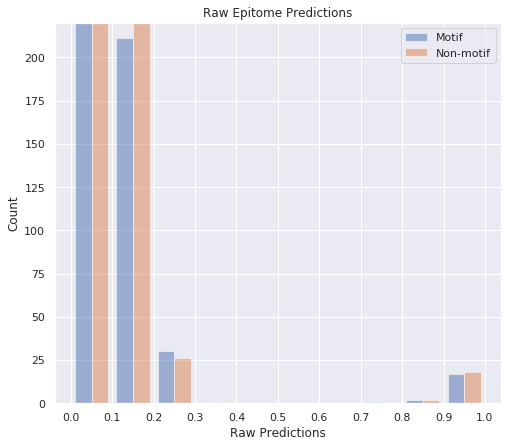

(20, 20)

In [157]:
E2F1_motif_preds, E2F1_non_motif_preds = get_tf_preds("E2F1")
plt.figure(figsize=(8,7))
E2F1_motif_ones, E2F1_non_motif_ones = generate_hist(E2F1_motif_preds, E2F1_non_motif_preds)
E2F1_motif_ones, E2F1_non_motif_ones

(10000, 2)
(10000, 2)


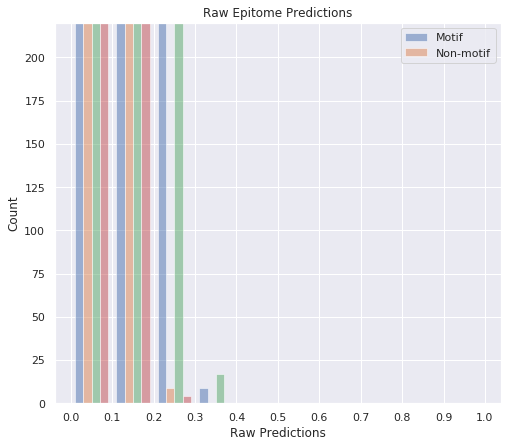

In [144]:
JUND_motif_preds, JUND_non_motif_preds = get_tf_preds("JUND")
plt.figure(figsize=(8,7))
JUND_motif_ones, JUND_non_motif_ones = generate_hist(JUND_motif_preds, JUND_non_motif_preds)

In [141]:
tf_models_dir = os.path.join("results/epitome_models/", TF + "_models")
tf_models_dir = os.path.join(tf_models_dir, query_cell + "_" + TF + "_motif")
tf_model_path = os.path.join(tf_models_dir, "model_params.pickle")

loaded_model = VLP(checkpoint=tf_models_dir)

In [147]:
epitome_data_path = "data/epitome_data" 
motif_dir = "data/motif_data/"
feature_path = os.path.join(epitome_data_path, "feature_name")

motifmat = np.load(os.path.join(motif_dir, "OVERLAP_HOCOMOCO_unique_motifmat.npz"))["tf"]
motifmap = pd.read_csv(os.path.join(motif_dir, "OVERLAP_HOCOMOCO_unique_motifmap.csv"), 
                       header=None).rename(columns={0:"Index", 1:"TF"})

train_data = scipy.sparse.load_npz(os.path.join(epitome_data_path, 'train.npz')).toarray()
valid_data = scipy.sparse.load_npz(os.path.join(epitome_data_path, 'valid.npz')).toarray()
test_data = scipy.sparse.load_npz(os.path.join(epitome_data_path, 'test.npz')).toarray()
data = {Dataset.TRAIN: train_data, Dataset.VALID: valid_data, Dataset.TEST: test_data}


matrix, cellmap, assaymap = get_assays_from_feature_file(feature_path,
                                                         eligible_assays = "JUND",
                                                         eligible_cells = None, 
                                                         min_cells_per_assay = 2, 
                                                         min_assays_per_cell= 2) #10)

In [154]:
loaded_motif_model = VLP(data=data,
#                          matrix = matrix,
#                          cellmap = cellmap,
#                          assaymap = assaymap,
#                          motifmat = motifmat, 
#                          motifmap = motifmap,
                         checkpoint=tf_models_dir)
# model_results = loaded_model.test(10000, calculate_metrics=True)

using ['SK-N-SH', 'K562', 'HepG2', 'HeLa-S3', 'H1', 'GM12892', 'GM12891', 'GM12878', 'A549'] as labels for mode Dataset.TRAIN
using ['SK-N-SH', 'K562', 'HepG2', 'HeLa-S3', 'H1', 'GM12892', 'GM12891', 'GM12878', 'A549'] as labels for mode Dataset.VALID
Instructions for updating:
Please use `layer.add_weight` method instead.


ValueError: Layer weight shape (10, 5) not compatible with provided weight shape (11, 5)

In [131]:
JUND_motif_preds

array([[0.0263021 , 0.03317766],
       [0.12663646, 0.06181637],
       [0.06144308, 0.02712526],
       ...,
       [0.07106382, 0.03942725],
       [0.01422904, 0.0119805 ],
       [0.01353396, 0.01175785]], dtype=float32)

In [132]:
JUND_non_motif_preds

array([[0.05253186, 0.02869652],
       [0.09533633, 0.04374032],
       [0.06132254, 0.03015677],
       ...,
       [0.08330693, 0.03790219],
       [0.02226404, 0.00976147],
       [0.02145958, 0.00717907]], dtype=float32)

In [145]:
np.concatenate((JUND_motif_preds, JUND_non_motif_preds), axis=1).shape

(10000, 4)